In [94]:
# Open Interest and Price Movement Analysis

import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
import numpy
import math
from scipy.stats import scoreatpercentile
from scipy.stats.mstats import mode, gmean, hmean
from pandas.core import datetools
from sklearn import datasets
import statsmodels.api as sm
from scipy.stats.stats import pearsonr 

In [113]:
#Open CSV file using pandas:
df1 = pd.read_csv('good.csv')
print(df1)

        Date    Price  Open Interest
0    1/31/12  1199.00         684586
1     2/7/12  1232.00         710111
2    2/14/12  1255.00         756274
3    2/21/12  1271.00         763912
4    2/28/12  1305.25         737025
5     3/6/12  1329.75         789533
6    3/13/12  1348.75         846793
7    3/20/12  1345.00         904276
8    3/27/12  1369.75         939213
9     4/3/12  1416.75        1048315
10   4/10/12  1426.00        1095714
11   4/17/12  1425.75        1137348
12   4/24/12  1461.25        1077314
13    5/1/12  1497.75        1112165
14    5/8/12  1437.75        1100686
15   5/15/12  1413.00        1104590
16   5/22/12  1413.50        1108738
17   5/29/12  1386.75        1093933
18    6/5/12  1349.50        1082409
19   6/12/12  1435.00        1099528
20   6/19/12  1433.75        1116839
21   6/26/12  1470.50        1046687
22    7/3/12  1572.25        1105822
23   7/10/12  1648.75        1177621
24   7/17/12  1639.00        1257622
25   7/24/12  1649.25        1259806
2

In [126]:
#Define your variable using data file. We take call the values (not strings) for quant analysis: 
z = df1['Date'].values
x = df1['Open Interest'].values
p = df1['Price'].values
print(z,x)

['1/31/12' '2/7/12' '2/14/12' '2/21/12' '2/28/12' '3/6/12' '3/13/12'
 '3/20/12' '3/27/12' '4/3/12' '4/10/12' '4/17/12' '4/24/12' '5/1/12'
 '5/8/12' '5/15/12' '5/22/12' '5/29/12' '6/5/12' '6/12/12' '6/19/12'
 '6/26/12' '7/3/12' '7/10/12' '7/17/12' '7/24/12' '7/31/12' '8/7/12'
 '8/14/12' '8/21/12' '8/28/12' '9/4/12' '9/11/12' '9/18/12' '9/25/12'
 '10/2/12' '10/9/12' '10/16/12' '10/23/12' '10/30/12' '11/6/12' '11/13/12'
 '11/20/12' '11/27/12' '12/4/12' '12/11/12' '12/18/12' '12/24/12'
 '12/31/12' '1/8/13' '1/15/13' '1/22/13' '1/29/13' '2/5/13' '2/12/13'
 '2/19/13' '2/26/13' '3/5/13' '3/12/13' '3/19/13' '3/26/13' '4/2/13'
 '4/9/13' '4/16/13' '4/23/13' '4/30/13' '5/7/13' '5/14/13' '5/21/13'
 '5/28/13' '6/4/13' '6/11/13' '6/18/13'] [ 684586  710111  756274  763912  737025  789533  846793  904276  939213
 1048315 1095714 1137348 1077314 1112165 1100686 1104590 1108738 1093933
 1082409 1099528 1116839 1046687 1105822 1177621 1257622 1259806 1165730
 1140078 1140549 1231055 1156476 1197773 1168

In [116]:
x_l = np.log(x)
p_l = np.log(p)

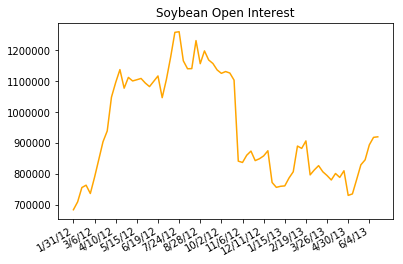

In [122]:
#Now for some data visualization with matplotlib. We begin by plotting the Open Interest timeseries:
plt.plot(z, x, c = 'orange')   
axes = plt.gca()  
plt.gcf().autofmt_xdate()  
axes.set_xticks(axes.get_xticks()[::5])
plt.title('Soybean Open Interest')
plt.show()

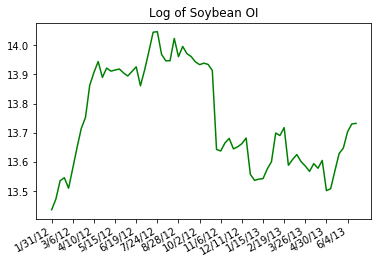

In [121]:
#Plot the log of the open interest values: 
a = np.log(x)
plt.plot(z, a, c = 'green')
axes = plt.gca()
plt.gcf().autofmt_xdate()
axes.set_xticks(axes.get_xticks()[::5])
plt.title('Log of Soybean OI')
plt.show()

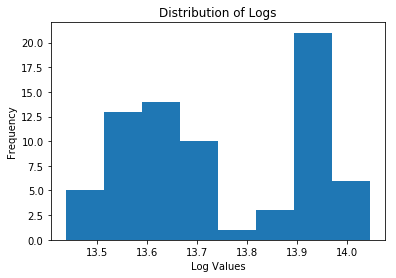

In [128]:
#Plot the distribution of Logs:
plt.hist(x_l, bins='auto', orientation='vertical')
plt.title('Distribution of Logs')
plt.ylabel('Frequency')
plt.xlabel('Log Values')
plt.show()

In [132]:
#Logistic Regression of price/oi
model = sm.OLS(x_l, p_l).fit()
predictions = model.predict(p_l)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.353e+05
Date:                Mon, 11 Jun 2018   Prob (F-statistic):          4.38e-146
Time:                        16:55:40   Log-Likelihood:                 42.041
No. Observations:                  73   AIC:                            -82.08
Df Residuals:                      72   BIC:                            -79.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.8847      0.002    857.484      0.000       1.880       1.889
==============================================================================
Omnibus:                        5.119   Durbin-Watson:                   0.246
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                3.624
Skew:                           0.398   Prob(JB):                        0.163
Kurtosis:                       2.253   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""